<a href="https://colab.research.google.com/github/Kirknasty54/Jackson_Kirkpatrick_ICP5/blob/main/Jackson_Kirkpatrick_Big_Data_ICP5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [489]:
#import google drive
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [504]:
#import the needed libaries/modules
import pandas as pd
import sklearn as skl
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn import metrics
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier
import seaborn as sns

In [ ]:
path_to_data = "/content/drive/MyDrive/glass.csv"
df = pd.read_csv(path_to_data)
print(df)

          RI     Na    Mg    Al     Si     K    Ca    Ba   Fe  Type
0    1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.0     1
1    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.0     1
2    1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.0     1
3    1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.0     1
4    1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.0     1
..       ...    ...   ...   ...    ...   ...   ...   ...  ...   ...
209  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.0     7
210  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.0     7
211  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.0     7
212  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.0     7
213  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.0     7

[214 rows x 10 columns]


<Axes: xlabel='Type', ylabel='Na'>

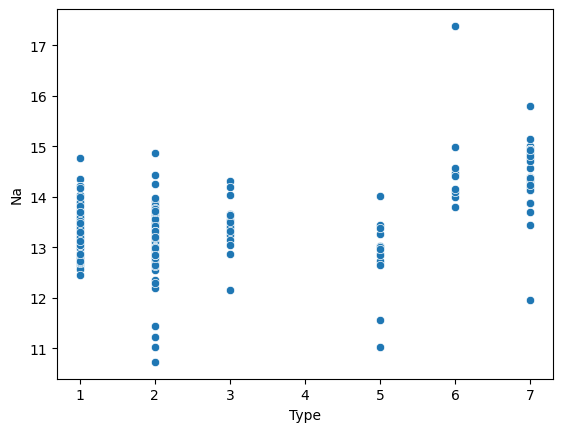

In [519]:
#visualizations
sns.scatterplot(data=df, x=df['Type'], y=df['Na'])

<Axes: xlabel='Type', ylabel='Ba'>

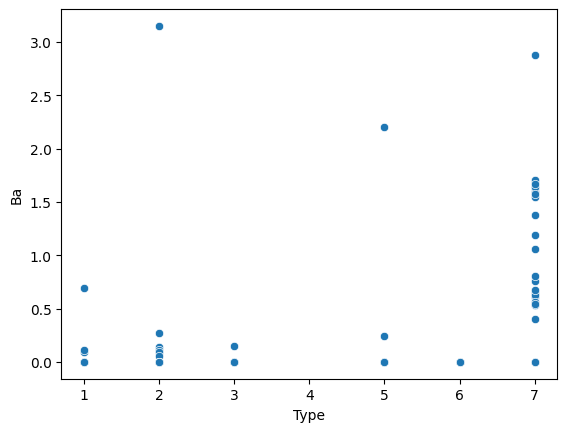

In [518]:
sns.scatterplot(data=df, x=df['Type'], y =df['Ba'])

In [524]:
#SVM model
y = df['Type'].values
x = df.drop('Type', axis=1).values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=109)

clf = svm.SVC(kernel = 'linear')
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, zero_division=0))

Accuracy:  0.676923076923077
              precision    recall  f1-score   support

           1       0.60      0.71      0.65        21
           2       0.65      0.71      0.68        24
           3       0.00      0.00      0.00         4
           5       0.60      1.00      0.75         3
           6       1.00      0.50      0.67         2
           7       1.00      0.73      0.84        11

    accuracy                           0.68        65
   macro avg       0.64      0.61      0.60        65
weighted avg       0.66      0.68      0.66        65



In [525]:
#Multi-layer perception method
mlp = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=500)
mlp.fit(x_train, y_train)

predict_train = mlp.predict(x_train)
predict_test = mlp.predict(x_test)
y_pred = mlp.predict(x_test)
print("Accuracy: ", metrics.accuracy_score(y_test, predict_test))
print(classification_report(y_train, predict_train, zero_division=0))

Accuracy:  0.4
              precision    recall  f1-score   support

           1       0.40      0.39      0.40        49
           2       0.38      0.75      0.51        52
           3       0.00      0.00      0.00        13
           5       0.00      0.00      0.00        10
           6       0.00      0.00      0.00         7
           7       0.00      0.00      0.00        18

    accuracy                           0.39       149
   macro avg       0.13      0.19      0.15       149
weighted avg       0.27      0.39      0.31       149

